In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import StratifiedShuffleSplit

In [2]:
train = pd.read_csv('train.csv').drop('id',axis=1)
train

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [3]:
test = pd.read_csv('test.csv')
test

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
5,14,0.292890,0.505851,0.297927,0.106263,white
6,15,0.584456,0.551680,0.628330,0.499118,white
7,16,0.485525,0.459242,0.657735,0.565337,blue
8,17,0.471757,0.407916,0.465992,0.406608,blue
9,18,0.572953,0.316454,0.668388,0.640692,clear


In [4]:
test_ids = test['id']
test_ids

0        3
1        6
2        9
3       10
4       13
5       14
6       15
7       16
8       17
9       18
10      20
11      21
12      24
13      26
14      33
15      38
16      40
17      41
18      42
19      43
20      44
21      46
22      48
23      49
24      50
25      51
26      52
27      53
28      55
29      57
      ... 
499    857
500    859
501    860
502    862
503    863
504    865
505    866
506    868
507    869
508    870
509    871
510    872
511    875
512    876
513    879
514    880
515    881
516    882
517    883
518    884
519    885
520    887
521    888
522    891
523    892
524    893
525    894
526    895
527    898
528    899
Name: id, Length: 529, dtype: int64

In [5]:
test.drop('id',axis=1,inplace=True)

In [6]:
import os
os.getcwd()

'C:\\Users\\djhws\\Downloads'

In [7]:
train.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')

In [8]:
# 데이터셋의 개요를 보기 위해 사용
train.head() 

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 17.5+ KB


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 5 columns):
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), object(1)
memory usage: 20.7+ KB


In [10]:
len(train)

371

In [11]:
len(test)

529

In [12]:
print(train.isnull().any().any())
print(test.isnull().any().any())

False
False


In [13]:
print(train.isnull().any())
print(test.isnull().any())

bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
type             False
dtype: bool
bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
dtype: bool


In [14]:
print(train.isnull())
print(test.isnull())

     bone_length  rotting_flesh  hair_length  has_soul  color   type
0          False          False        False     False  False  False
1          False          False        False     False  False  False
2          False          False        False     False  False  False
3          False          False        False     False  False  False
4          False          False        False     False  False  False
5          False          False        False     False  False  False
6          False          False        False     False  False  False
7          False          False        False     False  False  False
8          False          False        False     False  False  False
9          False          False        False     False  False  False
10         False          False        False     False  False  False
11         False          False        False     False  False  False
12         False          False        False     False  False  False
13         False          False   

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [16]:
gtype = train['type']
gtype

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, Length: 371, dtype: object

In [17]:
train.drop('type',axis=1,inplace=True)
train

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,clear
1,0.575560,0.425868,0.531401,0.439899,green
2,0.467875,0.354330,0.811616,0.791225,black
3,0.776652,0.508723,0.636766,0.884464,black
4,0.566117,0.875862,0.418594,0.636438,green
5,0.405680,0.253277,0.441420,0.280324,green
6,0.399331,0.568952,0.618391,0.467901,white
7,0.516224,0.536429,0.612776,0.468048,clear
8,0.314295,0.671280,0.417267,0.227548,blue
9,0.280942,0.701457,0.179633,0.141183,white


In [18]:
y_train = le.fit_transform(gtype)
y_train

array([1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0,

In [19]:
# 벡터이므로 열은 표시 안 됨
y_train.shape

(371,)

In [20]:
le.classes_

array(['Ghost', 'Ghoul', 'Goblin'], dtype=object)

In [21]:
gtype

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, Length: 371, dtype: object

In [22]:
gtype.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

There are 3 categores in the label, each category has 10 observations



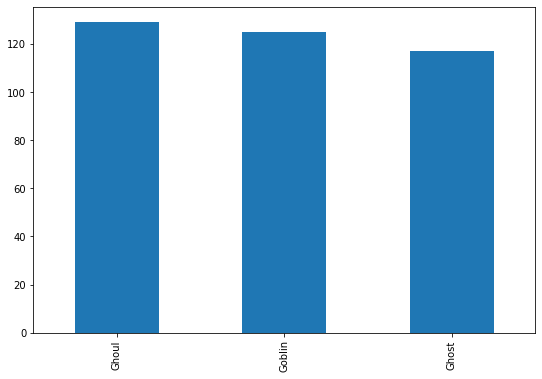

In [23]:
print('There are {} categores in the label, each category has 10 observations\n'.format(len(gtype.unique())))
plt.figure(figsize=(9,6));
gtype.value_counts().plot(kind='bar');

# 데이터가 편향되지 않았음

In [24]:
gtype.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [26]:
# 연속형 변수와 범주형 변수를 각각 다른 데이터프레임으로 구분
contColumns = train.columns[0:4]
catColumns = ['color']

In [28]:
train.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color'], dtype='object')

In [27]:
def setBoxplot(ax, ylim):
    ax.set_ylim(ylim);
    ax.tick_params(axis='y',labelsize=20,);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=16);

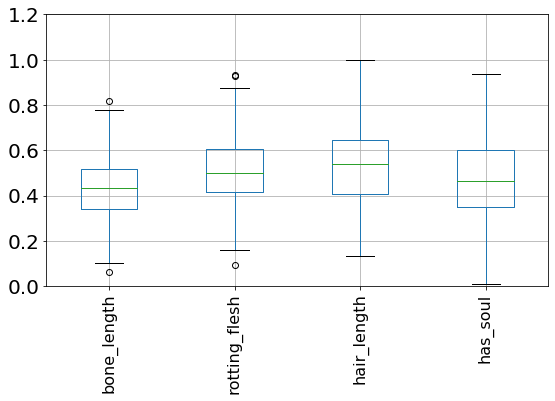

In [34]:
fig = plt.figure(figsize = (9,5));
ax = fig.add_subplot(1,1,1); # 행, 열, 인덱스
train[contColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,1.2])

In [36]:
fig = plt.figure(figsize = (9,5));

<Figure size 648x360 with 0 Axes>

In [37]:
ax = fig.add_subplot(1,1,1); # 행, 열, 인덱스

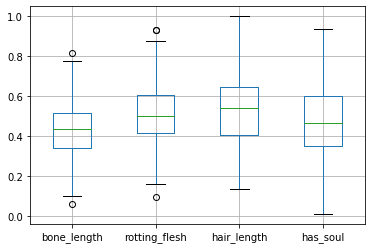

In [38]:
train[contColumns].boxplot(whis=1.5);

In [39]:
setBoxplot(ax,[0,1.2])

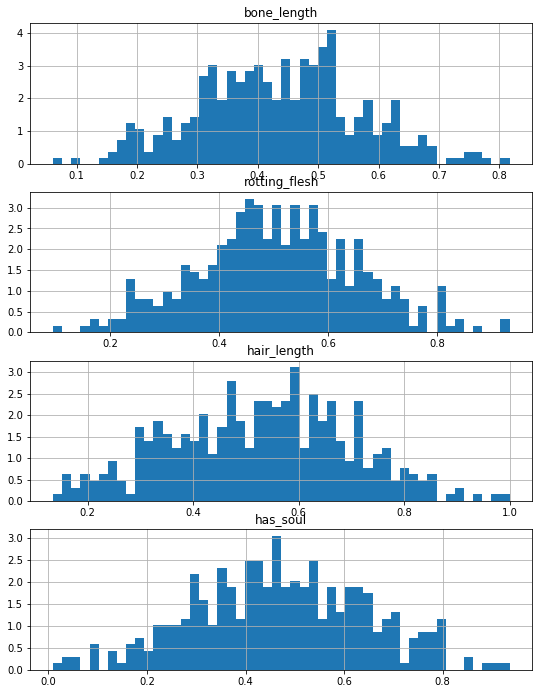

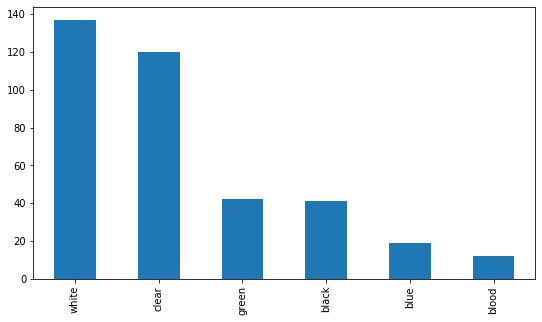

In [40]:
# 연속형 변수에 대한 히스토그램
fig=plt.figure(figsize=(9,15))
for i,col in enumerate(train[contColumns]):
    ax = fig.add_subplot(len(train.columns),1,i+1) # i : 그래프 자리 번호
    train[col].hist(bins=50,normed=True);
    ax.set_title(col)

# 범주형 변수에 대한 히스토그램
fig=plt.figure(figsize=(9,5))
for i,col in enumerate(train[catColumns]):
    train[col].value_counts().plot(kind='bar')

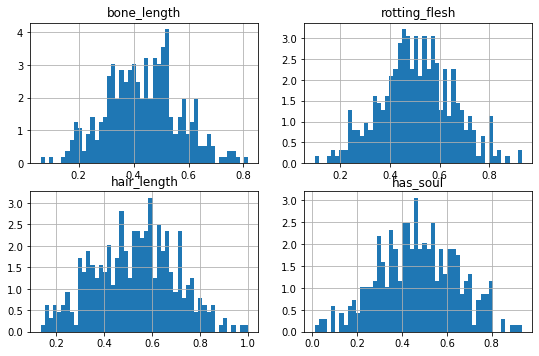

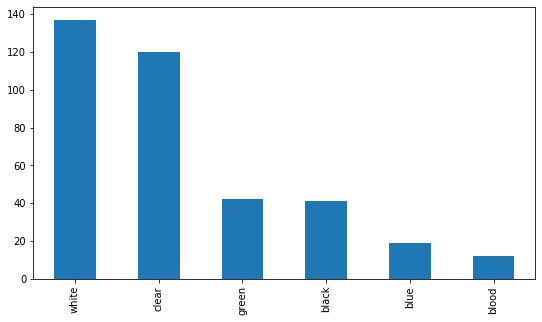

In [41]:
fig=plt.figure(figsize=(9,15))
for i,col in enumerate(train[contColumns]):
    ax = fig.add_subplot(len(train.columns),2,i+1) # i : 그래프 자리 번호
    train[col].hist(bins=50,normed=True);
    ax.set_title(col)

fig=plt.figure(figsize=(9,5))
for i,col in enumerate(train[catColumns]):
    train[col].value_counts().plot(kind='bar')

In [42]:
len(train.columns)

5

In [43]:
def correlation_matrix(df,ax1):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    cmap = cm.get_cmap('RdYlBu', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap, vmin=-1.0, vmax=1.0)
    ax1.grid(True)
    labels = df.columns
    ax1.set_xticks(range(0,len(labels)))
    ax1.set_xticklabels(labels,fontsize=12,rotation=90)
    ax1.set_yticks(range(0,len(labels)))
    ax1.set_yticklabels(labels,fontsize=12)
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=16)
    ax1.grid(b=False)

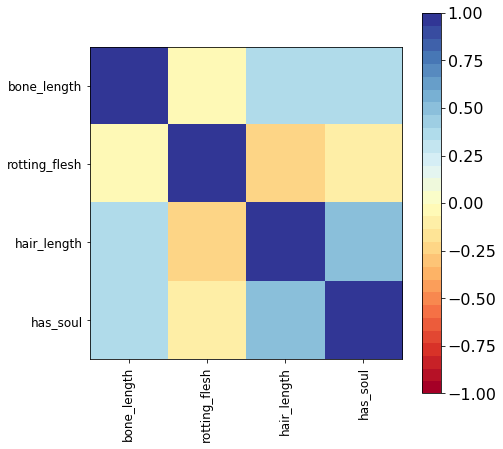

In [44]:
# correlation matrix for margin features
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[contColumns],ax)

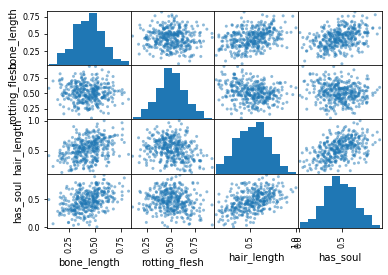

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(train)
plt.show()

In [53]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,clear
1,0.575560,0.425868,0.531401,0.439899,green
2,0.467875,0.354330,0.811616,0.791225,black
3,0.776652,0.508723,0.636766,0.884464,black
4,0.566117,0.875862,0.418594,0.636438,green


In [55]:
test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [46]:
# label encode the categorical features

x_data_df = pd.DataFrame(np.vstack([train,test]),columns = train.columns) 
colLes = []
for col in catColumns:
    colLe = LabelEncoder()
    x_data_df[col] = colLe.fit_transform(x_data_df[col])
    colLes.append(colLe)
x_data_df.head()

# color 변수 값을 interger 값으로 encoding 하고 train과 test를 row로 병합

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,3
1,0.57556,0.425868,0.531401,0.439899,4
2,0.467875,0.35433,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,4


In [54]:
np.vstack([train,test])

array([[0.3545121845821541, 0.35083902671065004, 0.4657608918291205,
        0.78114166586219, 'clear'],
       [0.5755599050254655, 0.42586843221058457, 0.5314013787091408,
        0.43989887703728897, 'green'],
       [0.467875498742323, 0.3543304203917748, 0.8116160896689244,
        0.7912249733377691, 'black'],
       ...,
       [0.5104973968247725, 0.4983474541673617, 0.7080199158094475,
        0.7141538544081929, 'white'],
       [0.33147215359934745, 0.7658345649295655, 0.3382066518541627,
        0.19343091476467486, 'clear'],
       [0.2567891927553072, 0.6918024425042691, 0.4151968053837178,
        0.3489712010801874, 'white']], dtype=object)

In [47]:
# 범주형 변수에 one hot encoidng 수행
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_cat = ohe.fit_transform(x_data_df[catColumns])
n_x_cat = x_cat
print(n_x_cat.shape)
type(n_x_cat)

(900, 6)


scipy.sparse.csr.csr_matrix

In [56]:
x_data_df[catColumns]

,color
0,3
1,4
2,0
3,0
4,4
5,4
6,5
7,3
8,2
9,5


In [48]:
print(n_x_cat)
print(x_cat)

  (0, 3)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 5)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 5)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 2)	1.0
  (19, 4)	1.0
  (20, 3)	1.0
  (21, 5)	1.0
  (22, 3)	1.0
  (23, 5)	1.0
  (24, 3)	1.0
  :	:
  (875, 0)	1.0
  (876, 3)	1.0
  (877, 5)	1.0
  (878, 3)	1.0
  (879, 3)	1.0
  (880, 3)	1.0
  (881, 3)	1.0
  (882, 5)	1.0
  (883, 5)	1.0
  (884, 0)	1.0
  (885, 3)	1.0
  (886, 0)	1.0
  (887, 3)	1.0
  (888, 5)	1.0
  (889, 3)	1.0
  (890, 5)	1.0
  (891, 2)	1.0
  (892, 5)	1.0
  (893, 4)	1.0
  (894, 5)	1.0
  (895, 2)	1.0
  (896, 3)	1.0
  (897, 5)	1.0
  (898, 3)	1.0
  (899, 5)	1.0
  (0, 3)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 5)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 5)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 2)	1.0
  (19, 4)	1.0
  (20, 3)

In [58]:
print(n_x_cat)

  (0, 3)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 5)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 5)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 2)	1.0
  (19, 4)	1.0
  (20, 3)	1.0
  (21, 5)	1.0
  (22, 3)	1.0
  (23, 5)	1.0
  (24, 3)	1.0
  :	:
  (875, 0)	1.0
  (876, 3)	1.0
  (877, 5)	1.0
  (878, 3)	1.0
  (879, 3)	1.0
  (880, 3)	1.0
  (881, 3)	1.0
  (882, 5)	1.0
  (883, 5)	1.0
  (884, 0)	1.0
  (885, 3)	1.0
  (886, 0)	1.0
  (887, 3)	1.0
  (888, 5)	1.0
  (889, 3)	1.0
  (890, 5)	1.0
  (891, 2)	1.0
  (892, 5)	1.0
  (893, 4)	1.0
  (894, 5)	1.0
  (895, 2)	1.0
  (896, 3)	1.0
  (897, 5)	1.0
  (898, 3)	1.0
  (899, 5)	1.0


In [57]:
print(x_cat)

  (0, 3)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 5)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 5)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 5)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 2)	1.0
  (19, 4)	1.0
  (20, 3)	1.0
  (21, 5)	1.0
  (22, 3)	1.0
  (23, 5)	1.0
  (24, 3)	1.0
  :	:
  (875, 0)	1.0
  (876, 3)	1.0
  (877, 5)	1.0
  (878, 3)	1.0
  (879, 3)	1.0
  (880, 3)	1.0
  (881, 3)	1.0
  (882, 5)	1.0
  (883, 5)	1.0
  (884, 0)	1.0
  (885, 3)	1.0
  (886, 0)	1.0
  (887, 3)	1.0
  (888, 5)	1.0
  (889, 3)	1.0
  (890, 5)	1.0
  (891, 2)	1.0
  (892, 5)	1.0
  (893, 4)	1.0
  (894, 5)	1.0
  (895, 2)	1.0
  (896, 3)	1.0
  (897, 5)	1.0
  (898, 3)	1.0
  (899, 5)	1.0


In [49]:
# 표준화(scaling) : StandardScaler() 주로 씀
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_cont = x_data_df[contColumns].values
n_x_cont = ss.fit_transform(x_cont)
print(n_x_cont.shape)
type(n_x_cont)

(900, 4)


numpy.ndarray

In [64]:
x_cont

array([[0.3545121845821541, 0.35083902671065004, 0.4657608918291205,
        0.78114166586219],
       [0.5755599050254655, 0.42586843221058457, 0.5314013787091408,
        0.43989887703728897],
       [0.467875498742323, 0.3543304203917748, 0.8116160896689244,
        0.7912249733377691],
       ...,
       [0.5104973968247725, 0.4983474541673617, 0.7080199158094475,
        0.7141538544081929],
       [0.33147215359934745, 0.7658345649295655, 0.3382066518541627,
        0.19343091476467486],
       [0.2567891927553072, 0.6918024425042691, 0.4151968053837178,
        0.3489712010801874]], dtype=object)

In [65]:
n_x_cont

array([[-0.55352147, -1.00416702, -0.33005656,  1.76375272],
       [ 1.08789151, -0.51531896,  0.05406109, -0.15279153],
       [ 0.28826969, -0.98141913,  1.69383282,  1.82038426],
       ...,
       [ 0.60476305, -0.04308772,  1.08760456,  1.38752468],
       [-0.72460763,  1.69970305, -1.0764836 , -1.53704571],
       [-1.27917377,  1.21735271, -0.62594951, -0.6634746 ]])

In [50]:
# encoding한 데이터를 열 방향으로 병합
n_x_data = np.hstack([n_x_cont,n_x_cat.toarray()])
print(n_x_data.shape)
n_x_data

(900, 10)


array([[-0.55352147, -1.00416702, -0.33005656, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08789151, -0.51531896,  0.05406109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.28826969, -0.98141913,  1.69383282, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60476305, -0.04308772,  1.08760456, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72460763,  1.69970305, -1.0764836 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.27917377,  1.21735271, -0.62594951, ...,  0.        ,
         0.        ,  1.        ]])

In [68]:
n_x_data[1]

array([ 1.08789151, -0.51531896,  0.05406109, -0.15279153,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [66]:
n_x_cat.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [51]:
# 데이터 전처리 종료 후 다시 split 수행 
n_x_test = n_x_data[len(gtype):,:] # 372~900
n_x_train = n_x_data[0:len(gtype),:] # 0~371

In [69]:
n_x_data[len(gtype):,:]

array([[ 0.31722174, -0.76245779,  1.07629121, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01278841,  0.91256888,  0.25393967, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.89513755, -0.08489654,  0.80886724, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.60476305, -0.04308772,  1.08760456, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72460763,  1.69970305, -1.0764836 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.27917377,  1.21735271, -0.62594951, ...,  0.        ,
         0.        ,  1.        ]])

In [71]:
len(gtype)

371

In [72]:
gtype

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, Length: 371, dtype: object

In [73]:
print(n_x_train.shape)
print(y_train.shape)
print(n_x_test.shape)

(371, 10)
(371,)
(529, 10)


In [74]:
y_train

array([1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0,

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf = GridSearchCV(log_reg, params, refit='True', n_jobs=1, cv=5)
clf.fit(n_x_train, y_train)

# C=1, tol=0.0001로 best parameter로 찾음

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 500, 1000, 2000],
                         'tol': [0.0001, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit='True', return_train_score=False,
             scoring=None, verbose=0)

In [77]:
y_test_raw = clf.predict_proba(n_x_test)
y_test_raw_df = pd.DataFrame(y_test_raw, index=test_ids, columns=le.classes_) 
submission = pd.DataFrame({'id':y_test_raw_df.idxmax(axis=1).index,'type':y_test_raw_df.idxmax(axis=1).values})

submission

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Ghoul
8,17,Goblin
9,18,Ghoul


In [79]:
y_test_raw = clf.predict_proba(n_x_test)
y_test_raw

array([[0.0623307 , 0.58883341, 0.34883589],
       [0.34108179, 0.34332143, 0.31559678],
       [0.15080225, 0.48348713, 0.36571062],
       ...,
       [0.06523793, 0.6505384 , 0.28422367],
       [0.803695  , 0.05458612, 0.14171888],
       [0.67737598, 0.10730058, 0.21532344]])

In [80]:
y_test_raw_df = pd.DataFrame(y_test_raw, index=test_ids, columns=le.classes_) 
y_test_raw_df

,Ghost,Ghoul,Goblin
id,,,
3,0.062331,0.588833,0.348836
6,0.341082,0.343321,0.315597
9,0.150802,0.483487,0.365711
10,0.361829,0.356950,0.281221
13,0.622103,0.112366,0.265531
14,0.749394,0.044286,0.206320
15,0.147349,0.532260,0.320391
16,0.121913,0.500677,0.377411
17,0.283015,0.275592,0.441393


In [82]:
index=test_ids
index

0        3
1        6
2        9
3       10
4       13
5       14
6       15
7       16
8       17
9       18
10      20
11      21
12      24
13      26
14      33
15      38
16      40
17      41
18      42
19      43
20      44
21      46
22      48
23      49
24      50
25      51
26      52
27      53
28      55
29      57
      ... 
499    857
500    859
501    860
502    862
503    863
504    865
505    866
506    868
507    869
508    870
509    871
510    872
511    875
512    876
513    879
514    880
515    881
516    882
517    883
518    884
519    885
520    887
521    888
522    891
523    892
524    893
525    894
526    895
527    898
528    899
Name: id, Length: 529, dtype: int64

In [84]:
columns=le.classes_
columns

array(['Ghost', 'Ghoul', 'Goblin'], dtype=object)

In [85]:
submission = pd.DataFrame({'id':y_test_raw_df.idxmax(axis=1).index,'type':y_test_raw_df.idxmax(axis=1).values})
submission

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Ghoul
8,17,Goblin
9,18,Ghoul


In [86]:
y_test_raw_df.idxmax(axis=1)

id
3       Ghoul
6       Ghoul
9       Ghoul
10      Ghost
13      Ghost
14      Ghost
15      Ghoul
16      Ghoul
17     Goblin
18      Ghoul
20      Ghost
21      Ghoul
24     Goblin
26      Ghost
33      Ghoul
38      Ghost
40      Ghoul
41      Ghost
42      Ghost
43      Ghoul
44      Ghoul
46      Ghoul
48     Goblin
49     Goblin
50      Ghoul
51     Goblin
52      Ghoul
53     Goblin
55      Ghoul
57      Ghoul
        ...  
857     Ghost
859    Goblin
860     Ghost
862     Ghost
863     Ghoul
865     Ghoul
866    Goblin
868     Ghoul
869     Ghost
870     Ghoul
871    Goblin
872     Ghoul
875     Ghoul
876     Ghost
879     Ghost
880     Ghoul
881     Ghoul
882    Goblin
883    Goblin
884    Goblin
885     Ghost
887     Ghoul
888     Ghoul
891     Ghoul
892     Ghoul
893    Goblin
894     Ghost
895     Ghoul
898     Ghost
899     Ghost
Length: 529, dtype: object

In [87]:
submission.to_csv('C:/Users/djhws/Downloads/submission.csv', index=False)